# Introduction to Artificial Neural Networks with tf.keras

## See Also:
![title](learning.png)

## Prerequisites

In [1]:
!ls -l

total 9600
-rw-r--r--@ 1 alyristis  1081581096  4864297 Oct 24 16:04 Part-1-tf.keras-deeplizard.ipynb
drwxr-xr-x@ 5 alyristis  1081581096      160 Jul 15 23:50 TensorFlowJS
drwxr-xr-x@ 6 alyristis  1081581096      192 Oct 21 18:54 data
drwxr-xr-x@ 7 alyristis  1081581096      224 Jul 15 23:50 flask_apps
-rw-r--r--@ 1 alyristis  1081581096    44856 Oct 22 00:08 learning.png
drwxr-xr-x@ 4 alyristis  1081581096      128 Jul 15 23:50 models
-rw-r--r--@ 1 alyristis  1081581096     1830 Oct 22 18:17 versions.ipynb


1.	Install Python.
2.	Install TensorFlow.
3.	Install a Python IDE. 
    - We will be using Jupyter Notebook in this course.
4.	Install HDF5 and h5py to have the ability to save tf.keras models to disk.
5.	tf.keras is both CPU and GPU compatible. 
    - A GPU is not required for the course.
    - If using a GPU, you will need to set up the GPU according to the steps provided in an <a href="https://deeplizard.com/learn/video/IubEtS2JAiY">earlier episode</a>.
7.  If you are brand new to deep learning, then it is recommended that you start with our <a href="https://deeplizard.com/learn/playlist/PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU">Deep Learning Fundamentals course</a> first.

## Data Preparation and Processing

In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [3]:
train_labels =  []
train_samples = []

Example data: 
- An experiemental drug was tested on individuals from ages 13 to 100 in a clinical trial. 
- The trial had 2100 participants. Half were under 65 years old, half were 65 years or older.
- Around 95% of patients 65 or older experienced side effects.
- Around 95% of patients under 65 experienced no side effects.

In [4]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [5]:
for i in train_samples:
    print(i)

34
72
56
77
62
93
14
65
22
91
47
89
53
76
41
77
31
80
46
95
46
71
64
76
51
86
25
79
23
75
26
88
47
80
33
86
33
72
51
66
33
78
22
90
17
91
30
93
34
80
35
84
31
74
62
86
34
74
31
76
49
84
60
72
37
87
29
75
51
82
16
73
27
68
48
71
62
77
19
87
24
81
27
83
19
96
31
70
64
94
60
85
23
72
48
83
44
75
45
99
59
72
50
67
39
69
34
92
34
100
64
87
59
83
36
79
33
100
13
96
58
70
40
72
14
67
62
100
46
96
19
100
14
67
48
90
57
88
27
72
45
81
41
72
29
69
15
84
15
90
39
74
17
89
50
89
41
89
27
93
26
80
18
92
63
69
20
70
13
100
33
82
42
97
15
73
40
93
57
95
18
69
13
68
19
88
24
65
36
87
35
72
35
88
31
91
40
74
56
87
19
74
34
90
42
88
58
83
38
81
41
65
42
67
34
97
45
69
33
83
34
74
25
81
26
81
13
72
51
100
49
97
48
89
13
82
38
93
20
93
33
80
26
76
54
94
33
95
47
65
23
95
35
100
34
74
57
98
46
92
53
66
32
85
64
75
18
73
54
85
64
74
15
99
20
81
53
77
32
67
49
95
57
68
45
93
43
70
18
80
40
90
53
74
45
77
31
67
29
86
44
93
62
69
59
79
41
82
21
100
25
74
33
67
26
95
43
94
41
73
46
73
27
67
50
97
33
82
14
99
49

In [6]:
for i in train_labels:
    print(i)

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [7]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [9]:
for i in scaled_train_samples:
    print(i)

[0.56321839]
[0.3908046]
[0.14942529]
[0.13793103]
[0.70114943]
[0.67816092]
[0.63218391]
[0.5862069]
[0.64367816]
[0.44827586]
[0.86206897]
[0.22988506]
[0.6091954]
[0.75862069]
[0.29885057]
[0.28735632]
[0.93103448]
[0.52873563]
[0.12643678]
[0.57471264]
[0.88505747]
[0.32183908]
[0.27586207]
[0.98850575]
[0.48275862]
[0.59770115]
[0.89655172]
[0.3908046]
[0.89655172]
[0.72413793]
[0.6091954]
[0.36781609]
[0.47126437]
[0.83908046]
[0.44827586]
[0.86206897]
[0.89655172]
[0.55172414]
[0.26436782]
[0.37931034]
[1.]
[0.77011494]
[0.05747126]
[0.59770115]
[0.96551724]
[0.22988506]
[0.37931034]
[0.73563218]
[0.75862069]
[0.5862069]
[0.44827586]
[0.45977011]
[0.62068966]
[0.27586207]
[0.94252874]
[0.]
[0.70114943]
[0.42528736]
[0.98850575]
[0.51724138]
[0.25287356]
[0.55172414]
[0.82758621]
[0.67816092]
[0.03448276]
[0.83908046]
[0.20689655]
[0.11494253]
[0.72413793]
[0.31034483]
[0.70114943]
[0.65517241]
[0.68965517]
[0.31034483]
[0.62068966]
[0.01149425]
[0.01149425]
[0.55172414]
[0.28735

## Simple tf.keras Sequential Model


In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [11]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [14]:
model.fit(x=scaled_train_samples,
          y=train_labels, validation_split=0.1,
          batch_size=10,
          epochs=30,
          shuffle=True,
          verbose=2
)

Epoch 1/30
189/189 - 0s - loss: 0.6683 - accuracy: 0.5492 - val_loss: 0.6518 - val_accuracy: 0.5619
Epoch 2/30
189/189 - 0s - loss: 0.6321 - accuracy: 0.6005 - val_loss: 0.6159 - val_accuracy: 0.6429
Epoch 3/30
189/189 - 0s - loss: 0.5952 - accuracy: 0.7011 - val_loss: 0.5784 - val_accuracy: 0.7190
Epoch 4/30
189/189 - 0s - loss: 0.5606 - accuracy: 0.7439 - val_loss: 0.5402 - val_accuracy: 0.7857
Epoch 5/30
189/189 - 0s - loss: 0.5248 - accuracy: 0.7942 - val_loss: 0.5031 - val_accuracy: 0.8238
Epoch 6/30
189/189 - 0s - loss: 0.4913 - accuracy: 0.8217 - val_loss: 0.4668 - val_accuracy: 0.8619
Epoch 7/30
189/189 - 0s - loss: 0.4593 - accuracy: 0.8418 - val_loss: 0.4317 - val_accuracy: 0.8857
Epoch 8/30
189/189 - 0s - loss: 0.4297 - accuracy: 0.8635 - val_loss: 0.4000 - val_accuracy: 0.8857
Epoch 9/30
189/189 - 0s - loss: 0.4029 - accuracy: 0.8688 - val_loss: 0.3710 - val_accuracy: 0.9048
Epoch 10/30
189/189 - 0s - loss: 0.3799 - accuracy: 0.8878 - val_loss: 0.3460 - val_accuracy: 0.9238

In [15]:
assert model.history.history.get('accuracy')[-1] > 0.90
assert model.history.history.get('val_accuracy')[-1] > 0.90

## Preprocess Test Data

In [16]:
test_labels =  []
test_samples = []

In [17]:
for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [18]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [19]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

## Predict

In [20]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0) 

In [21]:
for i in predictions:
    print(i)

[0.9618439  0.03815611]
[0.96446437 0.0355357 ]
[0.96430224 0.03569779]
[0.9629502  0.03704977]
[0.8862937  0.11370628]
[0.20054433 0.79945564]
[0.96489257 0.03510746]
[0.37196085 0.6280392 ]
[0.03606184 0.9639381 ]
[0.08677513 0.9132249 ]
[0.9624734  0.03752669]
[0.96278423 0.03721574]
[0.0223136 0.9776864]
[0.9621599  0.03784014]
[0.37196085 0.6280392 ]
[0.02058567 0.9794143 ]
[0.20054433 0.79945564]
[0.96278423 0.03721574]
[0.96370226 0.03629769]
[0.12394219 0.8760578 ]
[0.04673246 0.9532676 ]
[0.9629502  0.03704977]
[0.95974314 0.04025682]
[0.0511925 0.9488075]
[0.54787457 0.45212546]
[0.9660451  0.03395489]
[0.01898897 0.9810111 ]
[0.96566755 0.03433247]
[0.20054433 0.79945564]
[0.01751387 0.9824861 ]
[0.02418298 0.975817  ]
[0.96370226 0.03629769]
[0.01898897 0.9810111 ]
[0.0307532 0.9692468]
[0.33917013 0.6608299 ]
[0.01751387 0.9824861 ]
[0.44091398 0.5590861 ]
[0.95974314 0.04025682]
[0.96566755 0.03433247]
[0.9621599  0.03784014]
[0.02058567 0.9794143 ]
[0.8862937  0.11370628

In [22]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [23]:
for i in rounded_predictions:
    print(i)

0
0
0
0
0
1
0
1
1
1
0
0
1
0
1
1
1
0
0
1
1
0
0
1
0
0
1
0
1
1
1
0
1
1
1
1
1
0
0
0
1
0
0
1
0
0
1
1
0
1
1
1
1
0
0
1
1
1
0
0
1
0
0
1
0
0
0
0
1
0
0
1
1
1
0
1
1
0
1
1
0
0
1
0
1
0
0
0
1
1
1
1
0
1
1
1
1
0
0
0
0
0
1
1
1
0
1
1
1
0
1
0
1
0
0
0
1
0
0
0
1
0
0
1
0
0
1
1
1
1
1
1
0
0
0
0
0
1
1
1
0
1
0
1
0
1
0
0
1
0
1
1
1
1
1
1
0
1
0
0
1
0
0
0
0
0
0
0
0
1
1
1
1
1
1
0
0
1
0
0
0
1
0
1
1
1
0
0
1
0
1
0
1
1
0
1
0
1
0
0
1
1
0
0
1
0
1
0
1
1
0
0
1
0
0
1
1
0
0
0
1
1
1
1
0
0
0
1
1
0
0
0
1
1
1
0
0
1
0
0
1
1
1
1
0
0
1
1
0
1
0
1
0
1
0
1
1
0
0
1
0
0
1
1
1
1
1
1
0
1
0
1
1
1
1
1
0
0
0
1
0
1
0
1
1
1
0
0
0
1
1
0
1
1
0
0
0
1
0
0
1
0
1
1
0
1
1
0
1
0
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
0
1
0
0
0
1
0
1
0
1
0
1
0
0
1
0
0
1
0
1
0
0
0
0
0
1
1
1
1
1
1
0
1
0
1
0
0
1
1
0
1
1
0
1
0
1
0
0
1
1
0
0
0
0
0
0
1
1
1
1
1
1
0
1
1
0
1
1
1
1
0
1
0
0
0
1
1
1
0
1
0
1
1
1
0
1
0
0
1
1
0
1
0
0
1


## Confusion Matrix

In [24]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [25]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

##### Copied from SciKit Learn's website - Visualize output of confusion matrix

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[198  12]
 [  9 201]]


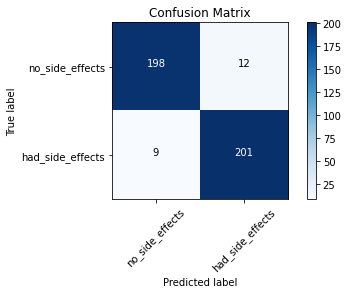

In [27]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Save and Load a Model

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 1. model.save()

In [29]:
# Checks first to see if file exists already.
# If not, the model is saved to disk.
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

This save functions saves:
- The architecture of the model, allowing to re-create the model.
- The weights of the model.
- The training configuration (loss, optimizer).
- The state of the optimizer, allowing to resume training exactly where you left off.


In [30]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [31]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
new_model.get_weights()

In [ ]:
new_model.optimizer

### 2. model.to_json()

If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only.

In [ ]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [ ]:
json_string

In [ ]:
# model reconstruction from JSON:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from tensorflow.keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [ ]:
model_architecture.summary()

### 3. model.save_weights()

If you only need to save the weights of a model, you can use the following function save the weights only.

In [ ]:
# Checks first to see if file exists already.
# If not, the weights are saved to disk.
import os.path
if os.path.isfile('models/my_model_weights.h5') is False:
    model.save_weights('models/my_model_weights.h5')

In [ ]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [ ]:
model2.load_weights('models/my_model_weights.h5')

In [ ]:
model2.get_weights()

# Convolutional Neural Networks

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

## Data preparation

The images included in the data/cats-and-dogs directory are a random subset of the full cat and dog data set from the following Kaggle competition:
https://www.kaggle.com/c/dogs-vs-cats/data

In [ ]:
# Organize data into train, valid, test dirs
os.chdir('data/dogs-vs-cats')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    for c in random.sample(glob.glob('cat*'), 500):
        shutil.move(c, 'train/cat'  )      
    for c in random.sample(glob.glob('dog*'), 500):
        shutil.move(c, 'train/dog')
    for c in random.sample(glob.glob('cat*'), 100):
        shutil.move(c, 'valid/cat')        
    for c in random.sample(glob.glob('dog*'), 100):
        shutil.move(c, 'valid/dog')
    for c in random.sample(glob.glob('cat*'), 50):
        shutil.move(c, 'test/cat')      
    for c in random.sample(glob.glob('dog*'), 50):
        shutil.move(c, 'test/dog')

os.chdir('../../')

In [ ]:
train_path = 'data/dogs-vs-cats/train'
valid_path = 'data/dogs-vs-cats/valid'
test_path = 'data/dogs-vs-cats/test'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

In [ ]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [ ]:
imgs, labels = next(train_batches)

In [ ]:
# This function will plot images in the form of a grid with 1 row and 10 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
plotImages(imgs)
print(labels)

## Build and train a CNN

In [ ]:
model = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
        MaxPool2D(pool_size=(2, 2), strides=2),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
        MaxPool2D(pool_size=(2, 2), strides=2),
        Flatten(),
        Dense(units=2, activation='softmax'),
])

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

In [ ]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10,
          verbose=2
)

## Predict

In [ ]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [ ]:
test_batches.classes

In [ ]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [ ]:
np.round(predictions)

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_batches.class_indices

In [ ]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Build Fine-tuned VGG16 model

In [ ]:
# Download model - Internet connection needed
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [ ]:
vgg16_model.summary()

In [ ]:
def count_params(model):
    non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return {'non_trainable_params': non_trainable_params, 'trainable_params': trainable_params}

In [ ]:
params = count_params(vgg16_model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 138357544

In [ ]:
type(vgg16_model)

In [ ]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [ ]:
model.summary()

In [ ]:
params = count_params(model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 134260544

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
model.add(Dense(units=2, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
params = count_params(model)
assert params['non_trainable_params'] == 134260544
assert params['trainable_params'] == 8194

## Train the fine-tuned VGG16 model

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

In [ ]:
assert model.history.history.get('accuracy')[-1] > 0.95

## Predict using fine-tuned VGG16 model

In [ ]:
predictions = model.predict(x=test_batches, steps= len(test_batches), verbose=0)

In [ ]:
test_batches.classes

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
test_batches.class_indices

In [ ]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# MobileNet

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
def prepare_image(file):
    img_path = 'data/MobileNet-samples/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [ ]:
from IPython.display import Image
Image(filename='data/MobileNet-samples/1.PNG', width=300,height=200) 

In [ ]:
preprocessed_image = prepare_image('1.PNG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

In [ ]:
assert results[0][0][1] == 'American_chameleon'

In [ ]:
Image(filename='data/MobileNet-samples/2.PNG', width=300,height=200) 

In [ ]:
preprocessed_image = prepare_image('2.PNG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

In [ ]:
assert results[0][0][1] == 'espresso'

In [ ]:
Image(filename='data/MobileNet-samples/3.PNG', width=300,height=200) 

In [ ]:
preprocessed_image = prepare_image('3.PNG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

In [ ]:
assert results[0][0][1] == 'strawberry'

## Fine-tune MobileNet on cats and dogs

### Image preparation

The images included in the data/cats-and-dogs directory are a random subset of the full cat and dog data set from the following Kaggle competition: https://www.kaggle.com/c/dogs-vs-cats/data

In [96]:
train_path = 'data/dogs-vs-cats/train'
valid_path = 'data/dogs-vs-cats/valid'
test_path = 'data/dogs-vs-cats/test'

In [97]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [98]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

### Modify Model

In [99]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [100]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [101]:
def count_params(model):
    non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return {'non_trainable_params': non_trainable_params, 'trainable_params': trainable_params}

In [102]:
params = count_params(mobile)
assert params['non_trainable_params'] == 21888
assert params['trainable_params'] == 4231976

In [103]:
x = mobile.layers[-6].output
output = Dense(units=2, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=output)

In [104]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [105]:
params = count_params(model)
assert params['non_trainable_params'] == 21888
assert params['trainable_params'] == 3209026

In [106]:
for layer in model.layers[:-5]:
    layer.trainable = False

In [107]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [108]:
params = count_params(model)
assert params['non_trainable_params'] == 2178240
assert params['trainable_params'] == 1052674

### Train the model

In [109]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [110]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10,
          verbose=2
)

Epoch 1/10
100/100 - 4s - loss: 0.2203 - accuracy: 0.9050 - val_loss: 0.2231 - val_accuracy: 0.8950
Epoch 2/10
100/100 - 3s - loss: 0.0565 - accuracy: 0.9800 - val_loss: 0.0359 - val_accuracy: 0.9850
Epoch 3/10
100/100 - 3s - loss: 0.0475 - accuracy: 0.9860 - val_loss: 0.0297 - val_accuracy: 0.9950
Epoch 4/10
100/100 - 3s - loss: 0.0337 - accuracy: 0.9920 - val_loss: 0.0417 - val_accuracy: 0.9850
Epoch 5/10
100/100 - 4s - loss: 0.0501 - accuracy: 0.9850 - val_loss: 0.0257 - val_accuracy: 0.9900
Epoch 6/10
100/100 - 3s - loss: 0.0239 - accuracy: 0.9940 - val_loss: 0.0224 - val_accuracy: 0.9950
Epoch 7/10
100/100 - 3s - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 8/10
100/100 - 4s - loss: 0.0184 - accuracy: 0.9970 - val_loss: 0.0399 - val_accuracy: 0.9900
Epoch 9/10
100/100 - 3s - loss: 0.0104 - accuracy: 0.9980 - val_loss: 0.0288 - val_accuracy: 0.9950
Epoch 10/10
100/100 - 3s - loss: 0.0110 - accuracy: 0.9970 - val_loss: 0.0082 - val_accuracy: 1.0000

In [111]:
assert model.history.history.get('accuracy')[-1] > 0.95

### Predict cats and dogs

In [112]:
test_labels = test_batches.classes

In [113]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [114]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

In [115]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [116]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [117]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

Confusion matrix, without normalization
[[48  2]
 [ 3 47]]


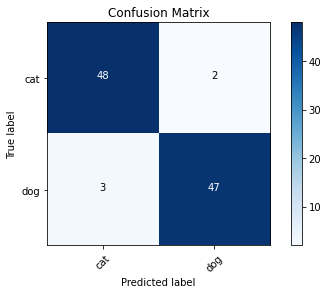

In [118]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [119]:
assert np.sum(test_labels == predictions.argmax(axis=1)) > 8

## Fine-tune MobileNet on sign language digits

### Image preparation

Dataset:
https://github.com/ardamavi/Sign-Language-Digits-Dataset
    
- 10 classes (digits 0-9)
- Class data:

  - class 0: 205 images
  - class 1: 206 images
  - class 2: 206 images
  - class 3: 206 images
  - class 4: 207 images
  - class 5: 207 images
  - class 6: 207 images
  - class 7: 206 images
  - class 8: 208 images
  - class 9: 204 images
  
Download data and save in current directory/data/Sign-Language-Digits-Dataset. Extract sub-directories labeled 0 through 9 and nest directories directly underneath Sign-Language-Digits-Dataset directory. Directory structure should look like this:

- data/
  - Sign-Language-Digits-Dataset/
    - 0/
    - 1/
    - 2/
    - ...
    - 9/

In [120]:
# Organize data into train, valid, test dirs
os.chdir('data/Sign-Language-Digits-Dataset')
if os.path.isdir('train/0/') is False: 
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

In [121]:
for i in range(0, 10):
    assert len(os.listdir(f'data/Sign-Language-Digits-Dataset/valid/{i}')) == 30
    assert len(os.listdir(f'data/Sign-Language-Digits-Dataset/test/{i}')) == 5

In [122]:
train_path = 'data/Sign-Language-Digits-Dataset/train'
valid_path = 'data/Sign-Language-Digits-Dataset/valid'
test_path = 'data/Sign-Language-Digits-Dataset/test'

In [123]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [124]:
assert train_batches.n == 1712
assert valid_batches.n == 300
assert test_batches.n == 50
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 10

### Modify Model

In [125]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [126]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [127]:
params = count_params(mobile)
assert params['non_trainable_params'] == 21888
assert params['trainable_params'] == 4231976

In [128]:
x = mobile.layers[-6].output
output = Dense(units=10, activation='softmax')(x)

In [129]:
model = Model(inputs=mobile.input, outputs=output)

In [130]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [131]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [132]:
params = count_params(model)
assert params['non_trainable_params'] == 1365184
assert params['trainable_params'] == 1873930

### Train the model

In [133]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [134]:
# Run for more epochs (~30) to see better results
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10,
          verbose=2
)

Epoch 1/10
172/172 - 14s - loss: 0.6231 - accuracy: 0.8189 - val_loss: 0.2848 - val_accuracy: 0.9333
Epoch 2/10
172/172 - 4s - loss: 0.1127 - accuracy: 0.9854 - val_loss: 0.1078 - val_accuracy: 0.9600
Epoch 3/10
172/172 - 5s - loss: 0.0624 - accuracy: 0.9901 - val_loss: 0.0982 - val_accuracy: 0.9733
Epoch 4/10
172/172 - 4s - loss: 0.0300 - accuracy: 0.9982 - val_loss: 0.0477 - val_accuracy: 0.9867
Epoch 5/10
172/172 - 4s - loss: 0.0226 - accuracy: 0.9988 - val_loss: 0.0425 - val_accuracy: 0.9933
Epoch 6/10
172/172 - 4s - loss: 0.0179 - accuracy: 0.9982 - val_loss: 0.0408 - val_accuracy: 0.9867
Epoch 7/10
172/172 - 5s - loss: 0.0159 - accuracy: 0.9988 - val_loss: 0.0299 - val_accuracy: 0.9900
Epoch 8/10
172/172 - 5s - loss: 0.0130 - accuracy: 0.9988 - val_loss: 0.0524 - val_accuracy: 0.9733
Epoch 9/10
172/172 - 5s - loss: 0.0142 - accuracy: 0.9988 - val_loss: 0.0349 - val_accuracy: 0.9833
Epoch 10/10
172/172 - 5s - loss: 0.0126 - accuracy: 0.9988 - val_loss: 0.0411 - val_accuracy: 0.986

### Predict sign language digits

In [135]:
test_labels = test_batches.classes

In [136]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [137]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [138]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 1 0 4 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


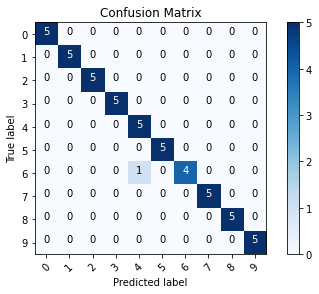

In [139]:
# Train the model for more epochs to see better results
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Data Augmentation

Data augmentation occurs when you create new data based on modifications of your existing data. In our case, our data will be images. Data augmentation on images would include transformations like:
 - Flipping the image either horizontally or vertically
 - Rotating the image
 - Zooming in or out on the image
 - Cropping the image
 - Varying the color on the image

In [140]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [141]:
# This function will plot images in the form of a grid with 1 row and 10 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [142]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True)

In [143]:
chosen_image = random.choice(os.listdir('data/dogs-vs-cats/train/dog'))

In [144]:
image_path = 'data/dogs-vs-cats/train/dog/' + chosen_image

In [145]:
assert os.path.isfile(image_path)

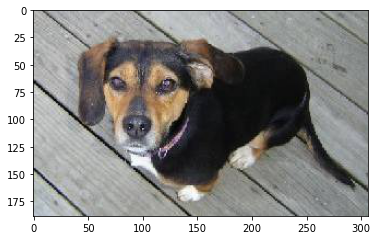

In [146]:
# Obtain image
image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])

In [147]:
# Generate batches of augmented images from this image
aug_iter = gen.flow(image)

In [148]:
# Get 10 samples of augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

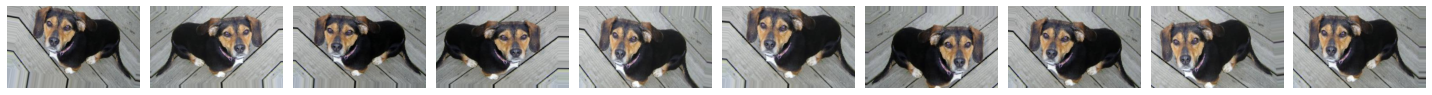

In [149]:
# Augmented images
plotImages(aug_images)